#### Gender-Career IAT Cleaning

In [202]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import glob
import seaborn as sns

sns.set_theme(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)


In [203]:
df_lst = []
files = glob.glob("data/gender_career_data/Gender*.sav")

for f in files:
    data = pd.read_spss(f)
    df_lst.append(data)

all_data = pd.concat(df_lst)    


In [204]:
all_data.count()

session_id        3159286
session_status    3159286
study_name        3159286
date              3159286
month             3159286
                   ...   
sius008             30789
sius009             30778
sius010             30772
sius011             30777
sius012             30762
Length: 192, dtype: int64

#### Removing Irrelevant / Incomplete Data 

In [205]:
to_drop = ['num_childunder18', 
           'actualduties', 
           'idealduties', 
           'primary1', 
           'num_primary1a', 
           'secondary1', 
           'num_secondary1a', 
           'surnameused', 
           'iatevaluations001', 
           'iatevaluations002', 
           'iatevaluations003', 
           'broughtwebsite', 
           'user_id', 
           'previous_session_id', 
           'previous_session_schema', 
           'numboys', 
           'numgirls', 
           'planchildren', 
           'childunder18', 
           'primary1a', 
           'primary1aa', 
           'secondary1a', 
           'secondary1aa', 
           'q2a',
           'q2b',
           'q2c',
           'q2d',
           'q3a',
           'q3b',
           'q3c',
           'q4',
           'femaleceos',
           'femalepres',
           'femalepres_2006',
           'femalepres_2007', 'hillary.hillary1',
           'hillary.hillary2',
           'hillary.hillary3',
           'hillary.hillary4',
           'hillary.hillary5',
           'hillary.hillary6',
           'hillary.hillary7',
           'hillary.hillary8',
           'hillary.hillary9',
           'hillary.hillary10','hillarycomp',
           'hillarytherm',
           'hillaryvote',
           'deathanxiety001',
           'deathanxiety002',
           'deathanxiety003',
           'deathanxiety004',
           'deathanxiety005',
           'deathanxiety006',
           'deathanxiety007',
           'deathanxiety008',
           'deathanxiety009',
           'deathanxiety010',
           'deathanxiety011',
           'deathanxiety012',
           'deathanxiety013',
           'deathanxiety014',
           'deathanxiety015',
           'fearcovid001',
           'fearcovid002',
           'fearcovid003',
           'fearcovid004',
           'fearcovid005',
           'fearcovid006',
           'fearcovid007',
           'fearcovid008',
           'pvd001',
           'pvd002',
           'pvd003',
           'pvd004',
           'pvd005',
           'pvd006',
           'pvd007',
           'pvd008',
           'pvd009',
           'pvd010',
           'pvd011',
           'pvd012',
           'pvd013',
           'pvd014',
           'pvd015',
           'sius001',
           'sius002',
           'sius003',
           'sius004',
           'sius005',
           'sius006',
           'sius007',
           'sius008',
           'sius009',
           'sius010',
           'sius011',
           'sius012', 
           'Order', 'Side_Career_34', 'Side_Male_34', 
           'D_biep.Male_Career_36', 'D_biep.Male_Career_47', 'Mn_RT_all_3',
           'Mn_RT_all_4', 'Mn_RT_all_6', 'Mn_RT_all_7', 'SD_all_3', 'SD_all_4', 
           'SD_all_6', 'SD_all_7', 'N_3', 'N_4', 'N_5', 'N_6', 'N_7', 
           'Mn_RT_correct_3', 'Mn_RT_correct_4', 'Mn_RT_correct_6', 
           'Mn_RT_correct_7', 'SD_correct_3', 'SD_correct_4', 'SD_correct_6', 
           'SD_correct_7', 'N_ERROR_3', 'N_ERROR_4', 'N_ERROR_6', 'N_ERROR_7']

In [206]:
removing_columns1 = all_data.drop(to_drop, axis=1)

In [207]:
comp1 = removing_columns1[removing_columns1['session_status']=='C']

In [220]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 64 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   session_id              1468590 non-null  float64 
 1   session_status          1468590 non-null  object  
 2   study_name              1468590 non-null  object  
 3   date                    1468590 non-null  float64 
 4   month                   1468590 non-null  float64 
 5   day                     1468590 non-null  float64 
 6   year                    1468590 non-null  float64 
 7   hour                    1468590 non-null  float64 
 8   weekday                 1468590 non-null  float64 
 9   birthmonth              781589 non-null   float64 
 10  birthyear               759174 non-null   float64 
 11  num_002                 784439 non-null   object  
 12  birthSex                561349 non-null   float64 
 13  genderIdentity          588084 non-null   ob

In [208]:
comp1.to_csv('data/comp1.csv')

In [209]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = (p.get_x() + p.get_width() / 2)
                _y = (p.get_y() + p.get_height()) + 3_000
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
# Source: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

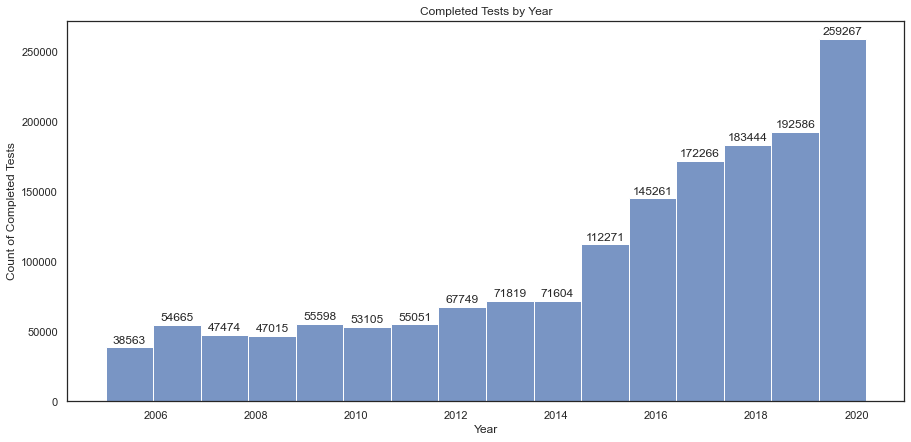

In [210]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

### Remove High Error Rates

Remove participants with high rates of error (more than 30%) or with too many fast trials (more than 10%)
 
"As is typical in IAT research, sessions were excluded if they had one of the following: (a) overall error rates above 30% (PCT_error_3467 > 30), or (b) more than 10% of trials with latency less than 300 ms (Greenwald, Nosek, & Banaji, 2003)." source = https://journals.sagepub.com/doi/full/10.1177/0146167218757454


IF  (pct_300>10 OR PCT_error_3467>30) Error='Yes'.

2.65% of tests were removed due to error. 

In [218]:
comp1.drop(comp1.index[comp1['PCT_error_3467'] >30], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
(comp_tests_n - comp1_after_errors_removed) / comp_tests_n * 100

2.644319211603211

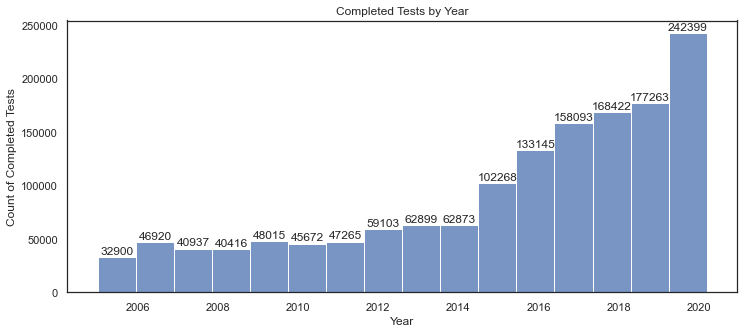

In [226]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

### Fix Education Columns & Combine 


In [227]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 64 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   session_id              1468590 non-null  float64 
 1   session_status          1468590 non-null  object  
 2   study_name              1468590 non-null  object  
 3   date                    1468590 non-null  float64 
 4   month                   1468590 non-null  float64 
 5   day                     1468590 non-null  float64 
 6   year                    1468590 non-null  float64 
 7   hour                    1468590 non-null  float64 
 8   weekday                 1468590 non-null  float64 
 9   birthmonth              781589 non-null   float64 
 10  birthyear               759174 non-null   float64 
 11  num_002                 784439 non-null   object  
 12  birthSex                561349 non-null   float64 
 13  genderIdentity          588084 non-null   ob

In [229]:
comp1.loc[:, 'edu_14'].fillna(comp1.edu_13, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [230]:
comp1.replace({'M.B.A.':'other advanced degree'}, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [231]:
comp1[['edu', 'edu_14', 'edu_13']].to_csv('data/edu.csv')

In [232]:
comp1.drop(labels='edu_13', inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [235]:
comp1.edu_14.replace(to_replace={"elementary school": 1, "junior high": 2, "some high school": 3, "high school graduate": 4, 
                                 "some college": 5, "associate's degree": 6, "bachelor's degree": 7, "some graduate school": 8, 
                                 "master's degree": 9, "J.D.": 10, "M.D.": 11, "Ph.D.": 12, "other advanced degree": 13, "M.B.A.": 13}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [245]:
comp1.edu_14.value_counts()

5.0     320647
7.0     294430
9.0     170868
4.0     103672
3.0      96245
8.0      90945
6.0      89448
13.0     60057
12.0     46531
10.0     25443
11.0     16455
2.0      12540
1.0       2300
Name: edu_14, dtype: int64

In [238]:
comp1.drop(columns='edu', inplace=True)

In [240]:
comp1.edu_14.replace(to_replace={-999.0: np.nan}, inplace=True)

In [244]:
comp1.edu_14.isna().sum()

139009

In [246]:
comp1[['edu_14', 'year']].to_csv('data/edu_14.csv')

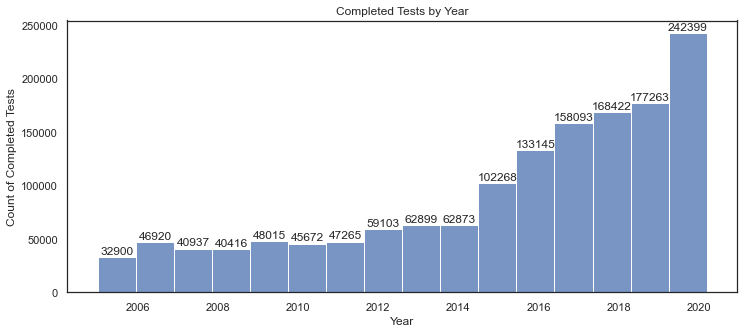

In [247]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [248]:
comp1.to_csv('data/comp_err_edu.csv')

### Renaming & Cleaning up Some More Columns

In [249]:
comp2 = comp1.rename(columns={'D_biep.Male_Career_all': 'Implicit Measure'})

In [250]:
comp2.drop(columns=['Mn_RT_all_3467', 'N_3467', 'PCT_error_3467', 'pct_300', 'pct_400', 'pct_2K', 'pct_3K', 'pct_4K'], inplace=True, axis=1)

In [251]:
comp2.drop(columns=['birthmonth', 'num_002', 'major'], inplace=True, axis=1)

### Occupation Fixes

In [258]:
comp2.pivot_table(index='year', columns=['occuself'], values='session_id', aggfunc='count')

occuself,,-999,.,Administrative Support,Arts/Design/Entertainment/Sports,Business,Computer/Math,Construction/Extraction,Education,Engineers/Architects,...,Military,Production,Protective Service,Repair/Installation,Sales,Science,Service and Personal Care,Social Service,Transportation,Unemployed
year,,,,,,,,,,,,,,,,,,,,,
2016.0,47953,11252,933,3534,2564,7664,3151,370,8973,3127,...,672,519,559,155,4615,2571,1023,1973,318,9108
2017.0,354,21321,122,6754,4623,15898,5619,628,16645,5808,...,1221,885,1292,284,8093,4468,1909,3629,624,17201


In [259]:
comp2.pivot_table(index='year', columns=['occuSelf'], values='session_id', aggfunc='count')

occuSelf,,.,Administrative Support,Arts/Design/Entertainment/Sports,Business,Computer/Math,Construction/Extraction,Education,Engineers/Architects,"Farming, Fishing, Forestry",...,Military,Production,Protective Service,Repair/Installation,Sales,Science,Service and Personal Care,Social Service,Transportation,Unemployed
year,,,,,,,,,,,,,,,,,,,,,
2018.0,128.0,23576.0,7245.0,4108.0,16795.0,6219.0,767.0,17801.0,6202.0,640.0,...,1392.0,1056.0,1176.0,409.0,8987.0,3915.0,2091.0,3923.0,852.0,18533.0
2019.0,25742.0,NaN,7859.0,4332.0,16013.0,6032.0,889.0,20101.0,6654.0,601.0,...,1966.0,1048.0,1093.0,404.0,8823.0,4122.0,2354.0,4466.0,828.0,19977.0
2020.0,34641.0,NaN,10340.0,6442.0,23445.0,8442.0,1326.0,26364.0,8875.0,942.0,...,2979.0,1581.0,1349.0,495.0,13040.0,6182.0,2867.0,6251.0,1280.0,25963.0


In [260]:
occuself_list = comp2['occuself'].unique()
occuself_list

array([nan, '-999', 'Legal', 'Social Service', 'Education', 'Management',
       'Arts/Design/Entertainment/Sports', 'Computer/Math', 'Unemployed',
       'Business', 'Administrative Support', 'Healthcare', 'Food service',
       'Sales', 'Construction/Extraction', 'Engineers/Architects',
       'Military', 'Protective Service', 'Maintenance', 'Science',
       'Production', 'Farming, Fishing, Forestry',
       'Service and Personal Care', 'Homemaker or Parenting',
       'Transportation', 'Repair/Installation', '.', ''], dtype=object)

In [261]:
occuSelf_list = comp2['occuSelf'].unique()
occuSelf_list

array(['.', 'Food service', 'Unemployed', 'Engineers/Architects',
       'Education', 'Sales', 'Healthcare', 'Computer/Math', 'Business',
       'Management', 'Social Service', 'Science',
       'Arts/Design/Entertainment/Sports', 'Legal',
       'Homemaker or Parenting', 'Administrative Support',
       'Service and Personal Care', 'Construction/Extraction',
       'Maintenance', 'Transportation', 'Military', 'Production',
       'Protective Service', '', 'Repair/Installation',
       'Farming, Fishing, Forestry', nan], dtype=object)

In [262]:
occupation_lst = comp2['occupation'].unique()
comp2[['occu_bp', 'occu_detail_bp']] = comp2.occupation.str.split(pat=' - ', expand=True)

In [263]:
comp2.replace({'.': np.nan, '': np.nan, 'nan': np.nan, 'null': np.nan, 'Nov-00': np.nan}, inplace = True)

In [264]:
comp2.replace({'-999': np.nan}, inplace = True)

In [266]:
comp2.occuself.isna().sum()

1259287

In [267]:
comp2[['occu_bp', 'occu_detail_bp', 'occuself', 'occuSelf', 'occuselfdetail', 'occuSelfDetail']].to_csv('data/comp2.csv')

In [269]:
comp2.occu_bp.replace({'Protective Services': 'Protective Service'}, inplace=True)
comp2.occu_bp.replace({'Protective services': 'Protective Service'}, inplace=True)

In [270]:
comp2.loc[comp2['occu_detail_bp'] == 'Student', 'occu_bp'] = 'Student'


In [271]:
comp2.occu_bp.count(), comp2.occu_bp.unique(), len(comp2.occu_bp.unique())

(492187,
 array([nan, 'Healthcare', 'Computer/Math', 'Legal', 'Management',
        'Education', 'Student', 'Business', 'Unemployed', 'Food Service',
        'Administrative Support', 'Arts/Design/Entertainment/Sports',
        'Homemaker or Parenting', 'Sales', 'Engineers/Architects',
        'Construction/Extraction', 'Retired', 'Service and Personal Care',
        'Social Service', 'Production', 'Science', 'Protective Service',
        'Farming, Fishing, Forestry', 'Repair/Installation', 'Military',
        'Maintenance', 'Transportation'], dtype=object),
 27)

In [272]:
comp2.occuSelf.count(), comp2.occuSelf.unique(), len(comp2.occuSelf.unique())

(503997,
 array([nan, 'Food service', 'Unemployed', 'Engineers/Architects',
        'Education', 'Sales', 'Healthcare', 'Computer/Math', 'Business',
        'Management', 'Social Service', 'Science',
        'Arts/Design/Entertainment/Sports', 'Legal',
        'Homemaker or Parenting', 'Administrative Support',
        'Service and Personal Care', 'Construction/Extraction',
        'Maintenance', 'Transportation', 'Military', 'Production',
        'Protective Service', 'Repair/Installation',
        'Farming, Fishing, Forestry'], dtype=object),
 25)

In [273]:
comp2.occuself.count(), comp2.occuself.unique(), len(comp2.occuself.unique())

(209303,
 array([nan, 'Legal', 'Social Service', 'Education', 'Management',
        'Arts/Design/Entertainment/Sports', 'Computer/Math', 'Unemployed',
        'Business', 'Administrative Support', 'Healthcare', 'Food service',
        'Sales', 'Construction/Extraction', 'Engineers/Architects',
        'Military', 'Protective Service', 'Maintenance', 'Science',
        'Production', 'Farming, Fishing, Forestry',
        'Service and Personal Care', 'Homemaker or Parenting',
        'Transportation', 'Repair/Installation'], dtype=object),
 25)

In [274]:
comp2.loc[:, 'occu_bp'].fillna(comp2.occuSelf, inplace=True)

In [275]:
comp2.loc[:, 'occu_bp'].fillna(comp2.occuself, inplace=True)

In [276]:
len(comp2.occu_bp)

1468590

In [277]:
comp3 = comp2.drop(columns=['occu_detail_bp', 'occuSelf', 'occuself', 'occupation'], axis=1).copy()

In [278]:
occu = comp3.drop(columns=['occuselfdetail', 'occuSelfDetail'], axis=1).copy()

In [280]:
occu.to_csv('data/occu.csv')

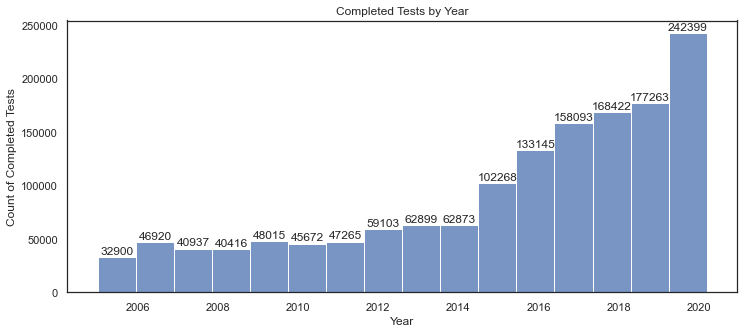

In [281]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(occu.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

### Birth Sex & Gender Identity Fixes

In [348]:
sex = occu.copy()
sex.birthsex.unique()

array([nan,  2.,  1.])

In [349]:
sex.groupby('birthsex').count()

,session_id,session_status,study_name,date,month,day,year,hour,weekday,birthyear,...,countrycit,countryres,raceomb,politicalid,religion2009,ethnic,politicalid_6,religion,genderidentity,occu_bp
birthsex,,,,,,,,,,,,,,,,,,,,,
1.0,78416,78416,78416,78416,78416,78416,78416,78416,78416,75508,...,26864,26839,25121,26770,0,0,0,0,78416,71401
2.0,154172,154172,154172,154172,154172,154172,154172,154172,154172,147705,...,51710,51656,48587,51538,0,0,0,0,154171,137535


In [350]:
sex.loc[:, 'sex'].fillna(sex.birthSex, inplace=True)

In [351]:
sex.sex.unique()

array([1.0, 2.0, nan, 'Female', 'Male'], dtype=object)

In [352]:
# Put birthSex and birthsex into sex
sex.loc[:, 'sex'].fillna(sex.birthSex, inplace=True)
sex.loc[:, 'sex'].fillna(sex.birthsex, inplace=True)

In [353]:
sex[['birthSex', 'birthsex', 'sex', 'genderIdentity', 'genderidentity']].to_csv('data/sex_only.csv')

In [354]:
sex_dict = {np.nan: 'Not Reported', 1.0: 'Male', 2.0: 'Female'}
sex.sex.replace(to_replace=sex_dict, inplace=True)

In [355]:
sex.drop(columns=['birthSex', 'birthsex', 'genderIdentity', 'genderidentity'], inplace=True)

In [356]:
sex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 43 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1468590 non-null  float64 
 1   session_status    1468590 non-null  object  
 2   study_name        1468590 non-null  object  
 3   date              1468590 non-null  float64 
 4   month             1468590 non-null  float64 
 5   day               1468590 non-null  float64 
 6   year              1468590 non-null  float64 
 7   hour              1468590 non-null  float64 
 8   weekday           1468590 non-null  float64 
 9   birthyear         759174 non-null   float64 
 10  ethnicityomb      1238710 non-null  object  
 11  raceomb_002       720451 non-null   object  
 12  raceombmulti      37009 non-null    object  
 13  Implicit Measure  1442690 non-null  float64 
 14  assocareer        1367103 non-null  object  
 15  assofamily        1365760 non-null

In [357]:
sex[['year', 'sex']].to_csv('data/yearsex.csv')

In [358]:
sex.loc[:, 'sex'].isna().sum(axis=0)

0

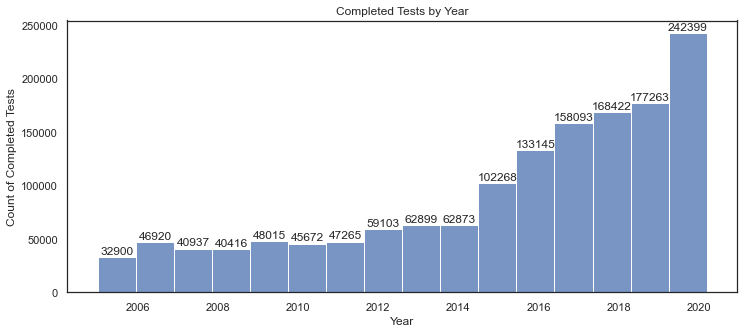

In [360]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(sex.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [361]:
sex.sex.value_counts()

Female          937525
Male            429452
Not Reported    101613
Name: sex, dtype: int64

In [364]:
sex.groupby('sex').count()

,session_id,session_status,study_name,date,month,day,year,hour,weekday,birthyear,...,havechildren,countrycit,countryres,raceomb,politicalid,religion2009,ethnic,politicalid_6,religion,occu_bp
sex,,,,,,,,,,,,,,,,,,,,,
Female,937525,937525,937525,937525,937525,937525,937525,937525,937525,510460,...,392304,444915,444095,404243,437657,279030,39336,35968,65999,818435
Male,429452,429452,429452,429452,429452,429452,429452,429452,429452,247313,...,166584,194616,194132,178586,193140,124641,15026,14037,24815,382154
Not Reported,101613,101613,101613,101613,101613,101613,101613,101613,101613,1401,...,12176,5477,5452,4646,5257,3208,387,376,456,4898


### Now to fix Ethnicity & Race... 

In [367]:
sex.to_csv('data/after_sex.csv')

In [401]:
racedf = sex.copy()

In [402]:
racedf.ethnicityomb.count(), racedf.ethnicityomb.unique(), len(racedf.ethnicityomb.unique())

(1238710,
 array([nan, 'Not Hispanic or Latino', 'Unknown', 'Hispanic or Latino'],
       dtype=object),
 4)

In [403]:
racedf.ethnic.count(), racedf.ethnic.unique(), len(racedf.ethnic.unique())

(54749,
 array([nan, 'White-Not of Hispanic Origin', 'Asian or Pacific Islander',
        'North American Indian or First Nation',
        'Black-Not of Hispanic Origin', 'Multi-racial (other)',
        'Other or Unknown', 'Multi-racial (Black and White)', 'Hispanic'],
       dtype=object),
 9)

In [404]:
racedf.raceomb.count(), racedf.raceomb.unique(), len(racedf.raceomb.unique())

(587475,
 array([nan, 'White', 'More than one race - Black/White',
        'More than one race - Other', 'Other or Unknown', 'South Asian',
        'American Indian/Alaska Native', 'Black or African American',
        'East Asian', 'Native Hawaiian or other Pacific Islander'],
       dtype=object),
 10)

In [405]:
racedf.raceomb_002.count(), racedf.raceomb_002.unique(), len(racedf.raceomb_002.unique())

(720451,
 array([nan, 'White', 'Black or African American', 'East Asian',
        'Multiracial', 'Other or unknown',
        'Native Hawaiian or other Pacific Islander', 'South Asian',
        'American Indian/Alaska Native'], dtype=object),
 9)

In [406]:
racedf.loc[:, 'raceomb'].fillna(racedf.raceomb_002, inplace=True)

In [407]:
racedf.replace({'More than one race - Black/White' : 'Multiracial'}, inplace = True)
racedf.replace({'More than one race - Other' : 'Multiracial'}, inplace = True)


In [408]:
racedf.raceomb.count(), racedf.raceomb.unique(), len(racedf.raceomb.unique())

(1234090,
 array([nan, 'White', 'Black or African American', 'East Asian',
        'Multiracial', 'Other or unknown',
        'Native Hawaiian or other Pacific Islander', 'South Asian',
        'American Indian/Alaska Native', 'Other or Unknown'], dtype=object),
 10)

In [409]:
# Put ethnic into raceomb
racedf.loc[:, 'raceomb'].fillna(racedf.ethnic, inplace=True)

In [410]:
racedf[['ethnicityomb', 'raceomb_002', 'raceombmulti', 'ethnic', 'raceomb']].to_csv('data/racedf.csv')

In [411]:
racedf.raceomb.unique()

array([nan, 'White', 'Black or African American', 'East Asian',
       'Multiracial', 'Other or unknown',
       'Native Hawaiian or other Pacific Islander', 'South Asian',
       'American Indian/Alaska Native', 'Other or Unknown',
       'White-Not of Hispanic Origin', 'Asian or Pacific Islander',
       'North American Indian or First Nation',
       'Black-Not of Hispanic Origin', 'Multi-racial (other)',
       'Multi-racial (Black and White)', 'Hispanic'], dtype=object)

In [412]:
race_dict = {'Hispanic': 'White', 'Other or unknown': 'Other or Unknown', 'White-Not of Hispanic Origin': 'White', 
            'Black-Not of Hispanic Origin': 'Black or African American', 'East Asian': 'Asian or Pacific Islander', 
             'Native Hawaiian or other Pacific Islander': 'Asian or Pacific Islander', 
            'North American Indian or First Nation': 'American Indian/Alaska Native', 'Multi-racial (other)': 'Multiracial', 
            'Multi-racial (Black and White)': 'Multiracial', 'South Asian': 'Asian or Pacific Islander', np.nan: 'Not Reported'}
racedf.raceomb.replace(to_replace=race_dict, inplace = True)


In [413]:
racedf.raceomb.unique()

array(['Not Reported', 'White', 'Black or African American',
       'Asian or Pacific Islander', 'Multiracial', 'Other or Unknown',
       'American Indian/Alaska Native'], dtype=object)

In [414]:
racedf.drop(columns=['ethnicityomb', 'raceomb_002', 'raceombmulti', 'ethnic'], inplace=True, axis=1)

In [415]:
racedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 39 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1468590 non-null  float64 
 1   session_status    1468590 non-null  object  
 2   study_name        1468590 non-null  object  
 3   date              1468590 non-null  float64 
 4   month             1468590 non-null  float64 
 5   day               1468590 non-null  float64 
 6   year              1468590 non-null  float64 
 7   hour              1468590 non-null  float64 
 8   weekday           1468590 non-null  float64 
 9   birthyear         759174 non-null   float64 
 10  Implicit Measure  1442690 non-null  float64 
 11  assocareer        1367103 non-null  object  
 12  assofamily        1365760 non-null  object  
 13  impcareer         1372136 non-null  category
 14  impfamily         1371594 non-null  category
 15  anninc            1178019 non-null

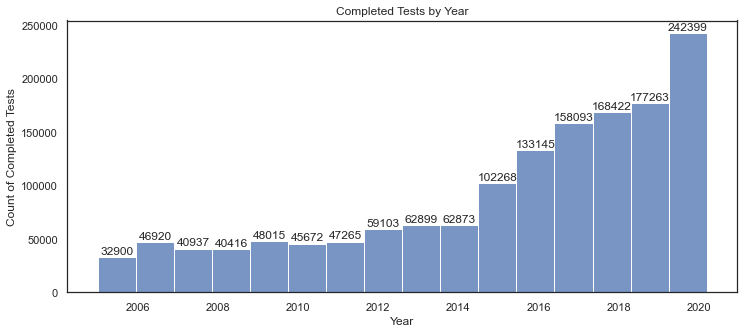

In [392]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(sex.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

### And on to Politics!!! 

In [416]:
racedf.to_csv('data/after_race.csv')

In [417]:
poldf = racedf.copy()

In [422]:
poldf.politicalid_7.count(), poldf.politicalid_7.unique(), len(poldf.politicalid_7.unique())

(1268500,
 array(['slightly conservative', nan, 'strongly liberal', 'neutral',
        'slightly liberal', 'moderately liberal', 'strongly conservative',
        'moderately conservative'], dtype=object),
 8)

In [423]:
poldf.politicalid.count(), poldf.politicalid.unique(), len(poldf.politicalid.unique())

(636054, array([nan,  6.,  7.,  5.,  4.,  3.,  2.,  1.]), 8)

In [424]:
poldf.politicalid_6.count(), poldf.politicalid_6.unique(), len(poldf.politicalid_6.unique())

(50381,
 array([nan, 'Slightly conservative', 'Slightly liberal',
        'Moderately liberal', 'Strongly libereal',
        'Moderately conservative', 'Strongly conservative'], dtype=object),
 7)

In [427]:
poldf.politicalid.replace(to_replace={1.0: "strongly conservative", 2.0: "moderately conservative", 3.0: "slightly conservative", 4.0: "neutral", 5.0: "slightly liberal", 6.0: "moderately liberal", 7.0: "strongly liberal"}, inplace=True)

In [429]:
pol_dict = {np.nan: 'Not Reported', 1.0: "strongly conservative", 2.0: "moderately conservative", 3.0: "slightly conservative", 4.0: "neutral", 5.0: "slightly liberal", 6.0: "moderately liberal", 7.0: "strongly liberal"}

In [430]:
poldf.politicalid.replace(to_replace=pol_dict, inplace=True)

In [432]:
poldf.loc[:, 'politicalid_7'].fillna(comp1.politicalid, inplace=True)

In [433]:
poldf[['politicalid_7', 'politicalid', 'politicalid_6']].to_csv('data/pol.csv')

In [434]:
poldf.drop(columns=['politicalid', 'politicalid_6'], inplace=True, axis=1)

In [436]:
poldf.politicalid_7.replace(to_replace=pol_dict, inplace=True)

In [437]:
poldf.politicalid_7.value_counts(normalize=True)

neutral                    0.259411
moderately liberal         0.216958
slightly liberal           0.111485
strongly liberal           0.104466
Not Reported               0.101941
moderately conservative    0.090132
slightly conservative      0.089939
strongly conservative      0.025668
Name: politicalid_7, dtype: float64

In [438]:
poldf.to_csv('data/poldf.csv')

### Fix Country Info

In [112]:
country = pol2.copy()

In [113]:
country[['countrycit_num', 'countryres_num', 'countrycit', 'countryres']].to_csv('data/country.csv')

In [114]:
country.loc[:, 'countryres'].fillna(country.countryres_num, inplace=True)

In [115]:
country.countryres.replace(to_replace={'US': 'U.S.A'}, inplace=True)

In [116]:
country.countryres.replace(to_replace={'U.S.A': 'U.S.A.'}, inplace=True)

In [117]:
country.countryres.count()

1413333

In [118]:
country.drop(columns=['countrycit_num', 'countryres_num', 'countrycit'], inplace=True)

### Fixing Age 

In [121]:
age4 = country.copy()

In [122]:
age4.birthyear.count()

759174

In [123]:
age4.age.count()

571626

In [124]:
age4['proper_age_calc'] = (age4['year'] - age4['birthyear']).where(age4['birthyear'] > 150)

In [125]:
age4.loc[:, 'age'].fillna((age4['birthyear']).where(age4['birthyear'] < 150), inplace=True)

In [126]:
age4.loc[:, 'proper_age_calc'].fillna((age4['birthyear']).where(age4['birthyear'] < 150), inplace=True)

In [127]:
age4[['age', 'birthyear', 'proper_age_calc']].to_csv('data/age.csv')

In [128]:
age4.loc[:, 'age'].fillna(age4.proper_age_calc, inplace=True)

In [129]:
age4.drop(columns=['proper_age_calc', 'birthyear'], inplace=True)

In [130]:
age4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 30 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1468590 non-null  float64 
 1   session_status    1468590 non-null  object  
 2   study_name        1468590 non-null  object  
 3   date              1468590 non-null  float64 
 4   month             1468590 non-null  float64 
 5   day               1468590 non-null  float64 
 6   year              1468590 non-null  float64 
 7   hour              1468590 non-null  float64 
 8   weekday           1468590 non-null  float64 
 9   Implicit Measure  1442690 non-null  float64 
 10  assocareer        1367103 non-null  object  
 11  assofamily        1365760 non-null  object  
 12  impcareer         1372136 non-null  category
 13  impfamily         1371594 non-null  category
 14  anninc            1178019 non-null  object  
 15  percentanninc     1224256 non-null

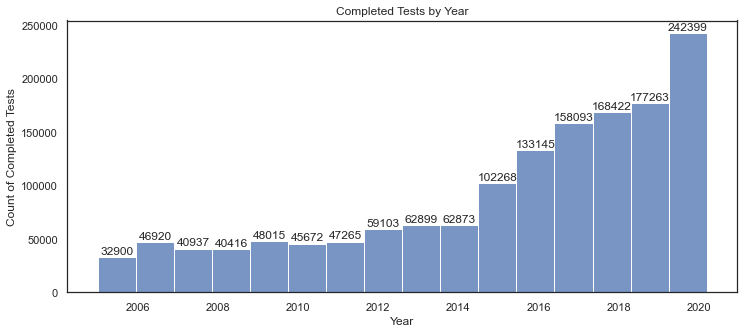

In [131]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(age4.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [132]:
age4.drop(columns=['MSANo', 'MSAName'], inplace=True)

In [133]:
finaldf=age4.copy()

In [135]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 28 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1468590 non-null  float64 
 1   session_status    1468590 non-null  object  
 2   study_name        1468590 non-null  object  
 3   date              1468590 non-null  float64 
 4   month             1468590 non-null  float64 
 5   day               1468590 non-null  float64 
 6   year              1468590 non-null  float64 
 7   hour              1468590 non-null  float64 
 8   weekday           1468590 non-null  float64 
 9   Implicit Measure  1442690 non-null  float64 
 10  assocareer        1367103 non-null  object  
 11  assofamily        1365760 non-null  object  
 12  impcareer         1372136 non-null  category
 13  impfamily         1371594 non-null  category
 14  anninc            1178019 non-null  object  
 15  percentanninc     1224256 non-null

In [138]:
finaldf.drop(columns=['study_name', 'month', 'day', 'weekday', 'num', 'session_status'], inplace=True)

In [165]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1468590 non-null  float64 
 1   date              1468590 non-null  float64 
 2   year              1468590 non-null  float64 
 3   hour              1468590 non-null  float64 
 4   Implicit Measure  1442690 non-null  float64 
 5   assocareer        1367103 non-null  object  
 6   assofamily        1365760 non-null  object  
 7   impcareer         1372136 non-null  category
 8   impfamily         1371594 non-null  category
 9   anninc            1178019 non-null  object  
 10  percentanninc     1224256 non-null  object  
 11  edu_14            1344320 non-null  object  
 12  politicalid_7     1318881 non-null  object  
 13  STATE             1468590 non-null  object  
 14  CountyNo          1468590 non-null  object  
 15  religionid        1147464 non-null

In [152]:
finaldf['Implicit Measure'].max(), finaldf['Implicit Measure'].min(), finaldf['Implicit Measure'].mean()

(1.834496894436833, -1.9234420591846053, 0.3583057517193266)

In [153]:
finaldf.assocareer.value_counts(normalize=True)

Neither male nor female    0.525959
Slightly male              0.202717
Moderately male            0.123596
Strongly male              0.053970
Slightly female            0.043005
Strongly female            0.026299
Moderately female          0.024454
Name: assocareer, dtype: float64

In [155]:
finaldf['assocareer_num'] = finaldf['assocareer'].replace(to_replace={"Strongly female": 1, "Moderately female": 2, "Slightly female": 3, "Neither male nor female": 4, "Slightly male": 5, "Moderately male": 6, "Strongly male": 7})

In [156]:
finaldf['assofamily_num'] = finaldf['assofamily'].replace(to_replace={"Strongly female": 1, "Moderately female": 2, "Slightly female": 3, "Neither male nor female": 4, "Slightly male": 5, "Moderately male": 6, "Strongly male": 7})

In [158]:
finaldf.to_csv('data/finaldf.csv')

In [200]:
finaldf.pivot_table(values='session_id', columns='year', index='sex', aggfunc='count')

year,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
sex,,,,,,,,,,,,,,,,
Female,19065.0,28033.0,27038.0,26414.0,30726.0,29524.0,31214.0,38015.0,38791.0,39443.0,63538.0,29986.0,100394.0,106086.0,115636.0,159844.0
Male,6990.0,11134.0,9779.0,10072.0,12340.0,11498.0,11865.0,15969.0,18472.0,18004.0,31347.0,13783.0,50645.0,54343.0,53333.0,72107.0
NaN,6845.0,7753.0,4120.0,3930.0,4949.0,4650.0,4186.0,5119.0,5636.0,5426.0,7383.0,89376.0,NaN,NaN,NaN,NaN


Some viz

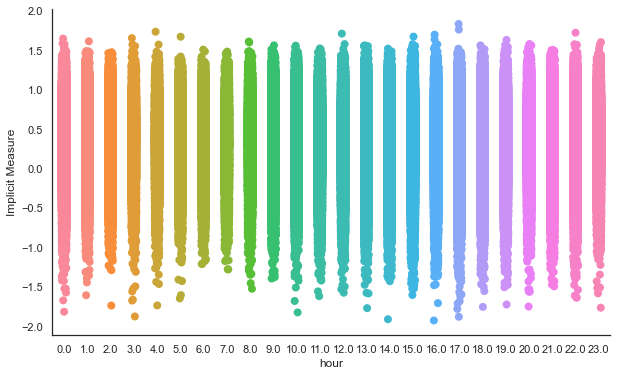

In [151]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x = "hour",
              y = "Implicit Measure",
              data = finaldf,
              jitter = True,
              ax = ax,
              s = 8)
sns.despine(right = True)
plt.show()

In [176]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   session_id        1468590 non-null  float64 
 1   date              1468590 non-null  float64 
 2   year              1468590 non-null  float64 
 3   hour              1468590 non-null  float64 
 4   Implicit Measure  1442690 non-null  float64 
 5   assocareer        1367103 non-null  object  
 6   assofamily        1365760 non-null  object  
 7   impcareer         1372136 non-null  category
 8   impfamily         1371594 non-null  category
 9   anninc            1178019 non-null  object  
 10  percentanninc     1224256 non-null  object  
 11  edu_14            1344320 non-null  object  
 12  politicalid_7     1318881 non-null  object  
 13  STATE             1468590 non-null  object  
 14  CountyNo          1468590 non-null  object  
 15  religionid        1147464 non-null

In [189]:
final = finaldf[finaldf.sex != 'NaN']

In [192]:
final.to_csv('data/final.csv')

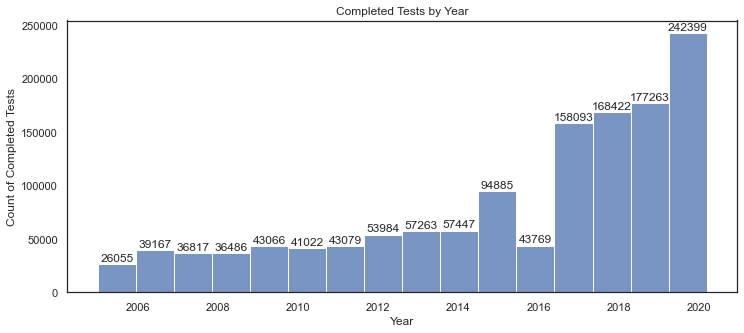

In [195]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(final.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontw

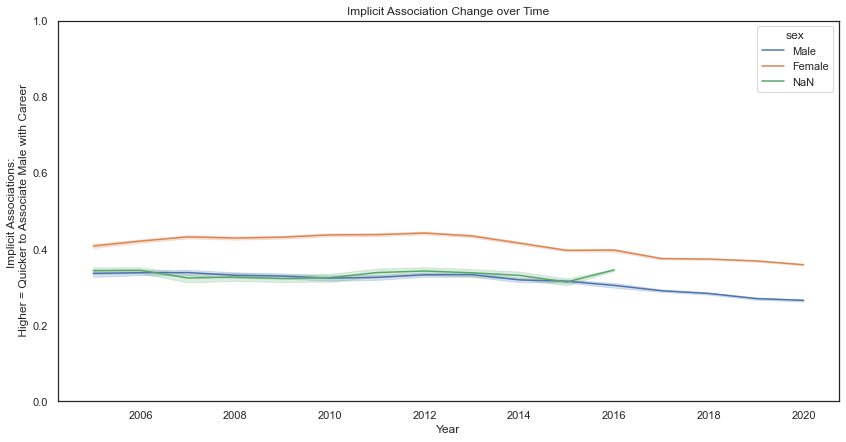

In [174]:
plt.figure(figsize=(14,7))

ax = sns.lineplot(x= 'year', y= 'Implicit Measure', data=finaldf, hue='sex')
ax.set_title('Implicit Association Change over Time')
ax.set_ylabel('Implicit Associations: \n Higher = Quicker to Associate Male with Career')
ax.set_xlabel('Year')
plt.setp(ax.get_xticklabels())
plt.setp(ax.get_yticklabels())
ax.set(ylim=(0, 1));


''

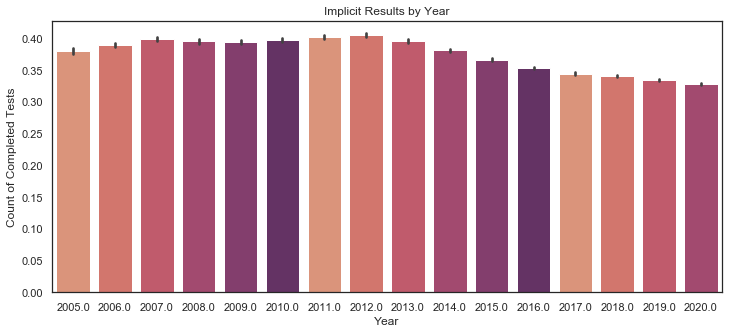

In [110]:
# Box & Whisker for Implicit results?? 

fig, ax = plt.subplots(figsize=(12, 5))

ax = sns.barplot(x= 'year', y="Implicit", data=finaldf, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Year')
ax.set_ylabel('Count of Completed Tests')
# show_values_on_bars(ax)
ax.set_xlabel('Year')
# plt.setp(ax.get_xticklabels())
# plt.setp(ax.get_yticklabels())

;

In [249]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 26 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   session_id      1468590 non-null  float64 
 1   session_status  1468590 non-null  object  
 2   study_name      1468590 non-null  object  
 3   date            1468590 non-null  float64 
 4   month           1468590 non-null  float64 
 5   day             1468590 non-null  float64 
 6   year            1468590 non-null  float64 
 7   hour            1468590 non-null  float64 
 8   weekday         1468590 non-null  float64 
 9   Implicit        1442690 non-null  float64 
 10  assocareer      1367103 non-null  float64 
 11  assofamily      1365760 non-null  float64 
 12  anninc          1178019 non-null  object  
 13  percentanninc   1224256 non-null  object  
 14  edu_14          1344320 non-null  object  
 15  politicalid_7   1318881 non-null  float64 
 16  STATE           1468

In [251]:
finaldf.sex.replace(to_replace={1.0: 'Male', 2.0: 'Female'}, inplace=True)

In [264]:
finaldf.sex.value_counts()

Female    883747
Male      401681
NaN       149373
Name: sex, dtype: int64

''

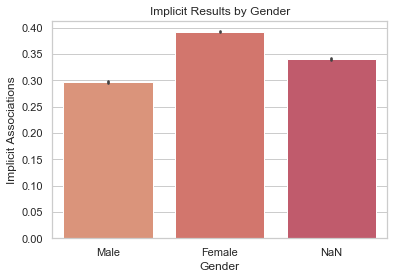

In [271]:
plt.figure()

ax = sns.barplot(x= 'sex', y= 'Implicit', data=finaldf, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Gender')
ax.set_ylabel('Implicit Associations')
ax.set_xlabel('Gender')
plt.show
;

''

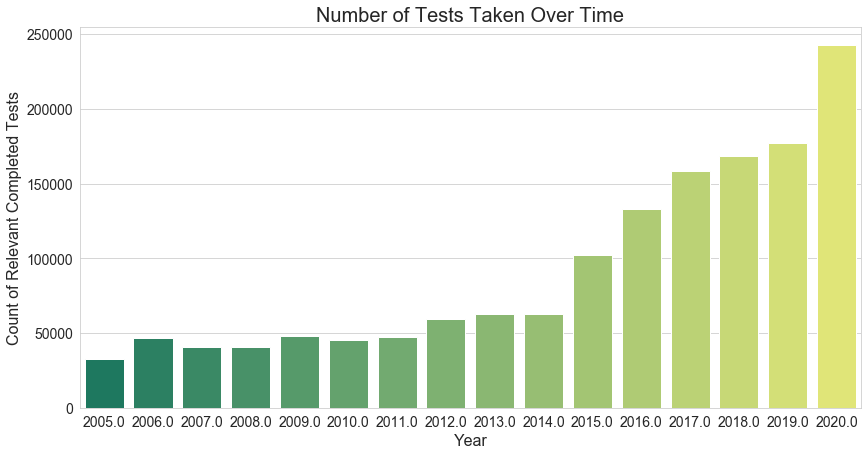

In [594]:
plt.figure(figsize=(14,7))

ax = sns.countplot(x= 'year', data=finaldf, palette='summer')
ax.set_title('Number of Tests Taken Over Time',fontsize=20)
ax.set_ylabel('Count of Relevant Completed Tests', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

#Take gradient off, should all be same color 

In [ ]:
# fig, ax = plt.subplots(nrows=2,ncols=2)

# vis1 = sns.histplot(finaldf["politicalid_7"], ax= ax[0][0])
# vis2 = sns.histplot(finaldf["Implicit"], bins=10, ax=ax[0][1])
# vis3 = sns.histplot(finaldf["age"], bins=10, ax=ax[1][0])
# vis4 = sns.histplot(finaldf["occu_bp"], ax=ax[1][1])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


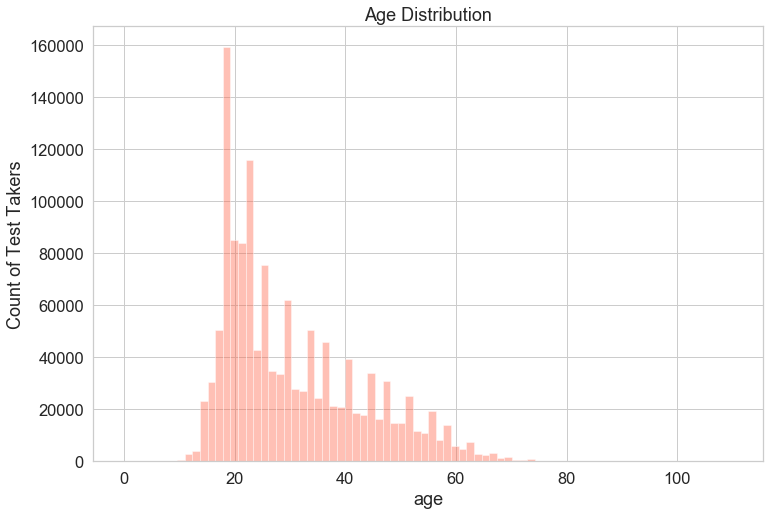

In [114]:
# source = https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python

with sns.plotting_context("notebook",font_scale=1.5):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    sns.set_style("whitegrid")
    sns.distplot(finaldf['age'].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count of Test Takers")

Something else I want to try  
multi = df.set_index(['Film', 'Chapter', 'Race', 'Character'])


In [115]:
# c_tests[
#     (c_tests.year == 'female')
#     & (titanic['class'].isin(['First', 'Third']))
#     & (titanic.age > 30)
#     & (titanic.survived == 0)
# ]

Correlations

Change scales (edu, politicalid, religionid, race) back to numeric for heatmap 

In [120]:
finaldf.assocareer.value_counts()

Neither male nor female    719040
Slightly male              277135
Moderately male            168969
Strongly male               73782
Slightly female             58792
Strongly female             35954
Moderately female           33431
Name: assocareer, dtype: int64

In [125]:
assocareer_dict = {"Strongly female": 1, "Moderately female": 2, "Slightly female": 3, "Neither male nor female": 4, "Slightly male": 5, "Moderately male": 6, "Strongly male": 7}

In [126]:
assofamily_dict = {"Strongly female": 1, "Moderately female": 2, "Slightly female": 3, "Neither male nor female": 4, "Slightly male": 5, "Moderately male": 6, "Strongly male": 7}

In [127]:
finaldf.assocareer.replace(to_replace=assocareer_dict, inplace=True)

In [128]:
finaldf.assofamily.replace(to_replace=assocareer_dict, inplace=True)

In [130]:
edu_dict = {'elementary': 1, 'junior high': 2, 'some high school': 3, 'high school graduate': 4, 'some college': 5, 'associates degree': 6, 'bachelors degree': 7, 'some graduate school or beyond': 8}

In [135]:
edu_dict2 = {'elementary school': 1, 'junior high': 2, 'some high school': 3, 'high school graduate': 4, 'some college': 5, 'associate\'s degree': 6, 'bachelor\'s degree': 7, 'some graduate school': 8}

In [138]:
finaldf.edu_14.replace(to_replace=edu_dict2, inplace=True)

In [141]:
edu_dict3 = {"master's degree": 8, "other advanced degree": 8, "Ph.D.": 8, "M.D.": 8, "J.D.": 8, -999.0: 'NaN'}

In [142]:
finaldf.edu_14.replace(to_replace=edu_dict3, inplace=True)

In [143]:
finaldf.edu_14.value_counts()

8      410299
5      320647
7      294430
4      103672
3       96245
6       89448
NaN     14739
2       12540
1        2300
Name: edu_14, dtype: int64

In [146]:
pol_dict = {"strongly conservative": 1, "moderately conservative": 2, "slightly conservative": 3, "neutral": 4, "slightly liberal": 5, "moderately liberal": 6, "strongly liberal": 7}

In [147]:
finaldf.politicalid_7.replace(to_replace=pol_dict, inplace=True)

In [148]:
finaldf.politicalid_7.value_counts()

4.0    380969
6.0    318622
5.0    163726
7.0    153417
2.0    132367
3.0    132084
1.0     37696
Name: politicalid_7, dtype: int64

TO DO: RELIGION ID & RACE THEN CORR VIZ THEN ASSIGNMENT

In [150]:
rel_dict = {"not at all religious": 1, "slightly religious": 2, "moderately religious": 3, "strongly religious": 4}

In [152]:
finaldf.religionid.replace(to_replace=rel_dict, inplace=True)

In [153]:
finaldf.religionid.value_counts()

2.0    363086
1.0    348435
3.0    310114
4.0    125829
Name: religionid, dtype: int64

In [171]:
sex_dict = {'Male': 1, 'Female': 2}
finaldf.sex.replace(to_replace=sex_dict, inplace=True)

In [173]:
finaldf.sex.value_counts()

2.0    883747
1.0    401681
NaN    149373
Name: sex, dtype: int64

In [155]:
finaldf.raceomb.replace(to_replace='Other or unknown', value='Other or Unknown', inplace=True)

In [157]:
race_dict = {'White': 6, 'Black or African American': 5, 'Multiracial': 7, 'East Asian': 2, 'Other or Unknown': 8, 'South Asian': 3, 'American Indian/Alaska Native': 1, 'Native Hawaiian or other Pacific Islander': 4}

In [158]:
finaldf.raceomb.replace(to_replace=race_dict, inplace=True)

In [161]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   session_id      1468590 non-null  float64
 1   session_status  1468590 non-null  object 
 2   study_name      1468590 non-null  object 
 3   date            1468590 non-null  float64
 4   month           1468590 non-null  float64
 5   day             1468590 non-null  float64
 6   year            1468590 non-null  float64
 7   hour            1468590 non-null  float64
 8   weekday         1468590 non-null  float64
 9   Implicit        1442690 non-null  float64
 10  assocareer      1367103 non-null  float64
 11  assofamily      1365760 non-null  float64
 12  anninc          1178019 non-null  object 
 13  percentanninc   1224256 non-null  object 
 14  edu_14          1344320 non-null  object 
 15  politicalid_7   1318881 non-null  float64
 16  STATE           1468590 non-null  obje

In [176]:
corrs = finaldf[['Implicit', 'assocareer', 'assofamily', 'anninc', 'edu_14', 'politicalid_7', 'age', 'raceomb', 'religionid', 'sex']].corr()
corrs

,Implicit,assocareer,assofamily,politicalid_7,age,raceomb,religionid
Implicit,1.000000,0.091195,-0.127903,-0.052299,0.045525,0.012385,0.055609
assocareer,0.091195,1.000000,0.000377,-0.106808,0.005947,-0.016676,0.067656
assofamily,-0.127903,0.000377,1.000000,0.000464,0.040384,-0.009514,-0.042122
politicalid_7,-0.052299,-0.106808,0.000464,1.000000,0.017871,-0.006538,-0.369428
age,0.045525,0.005947,0.040384,0.017871,1.000000,0.023562,-0.006960
raceomb,0.012385,-0.016676,-0.009514,-0.006538,0.023562,1.000000,-0.008682
religionid,0.055609,0.067656,-0.042122,-0.369428,-0.006960,-0.008682,1.000000


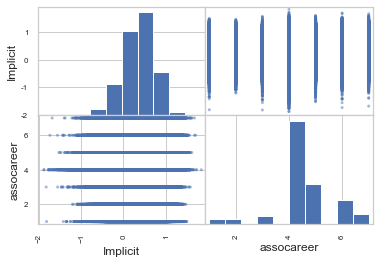

In [245]:
pd.plotting.scatter_matrix(finaldf[['Implicit', 'assocareer']]);

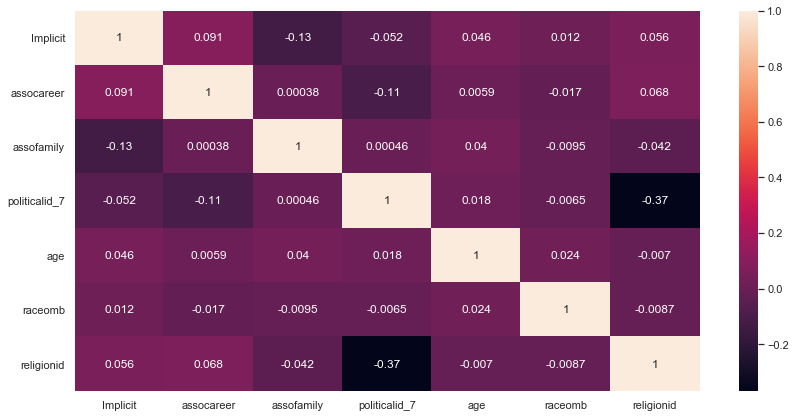

In [187]:
plt.figure(figsize=(14,7))

sns.heatmap(corrs, annot=True, fmt='.2g')
plt.show();

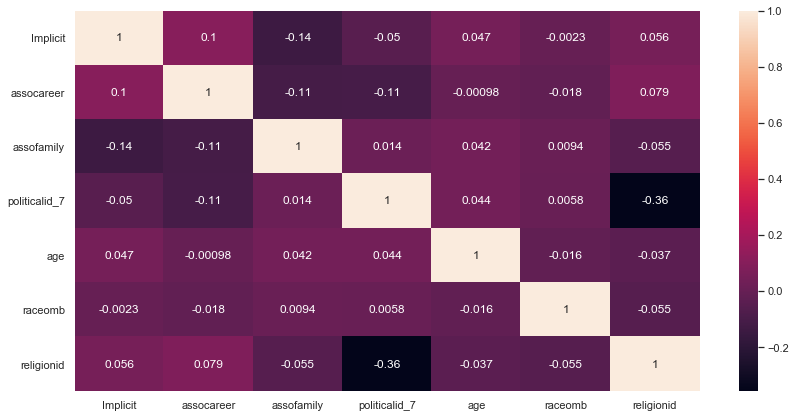

In [223]:
plt.figure(figsize=(14,7))

corr_s = finaldf[['Implicit', 'assocareer', 'assofamily', 'anninc', 'edu_14', 'politicalid_7', 'age', 'raceomb', 'religionid', 'sex']].corr(method = 'spearman')

sns.heatmap(corr_s, annot = True, fmt='.2g')

plt.show();

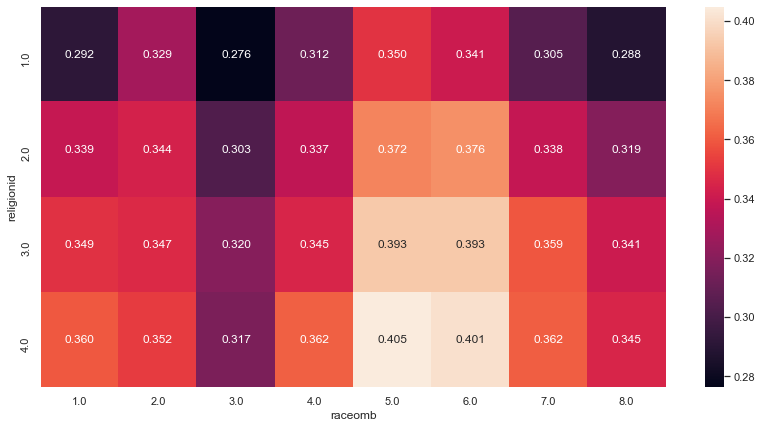

In [198]:
plt.figure(figsize=(14,7))

df_piv = finaldf.pivot_table(index='religionid', columns='raceomb', values='Implicit', aggfunc=np.mean)
sns.heatmap(df_piv, annot=True, fmt='.3f')

plt.show();

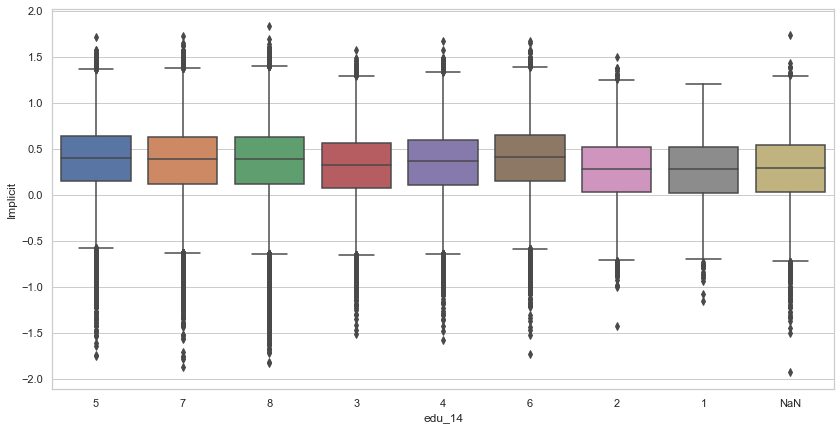

In [205]:
plt.figure(figsize=(14,7))
sns.boxplot(x="edu_14", y="Implicit", data=finaldf);

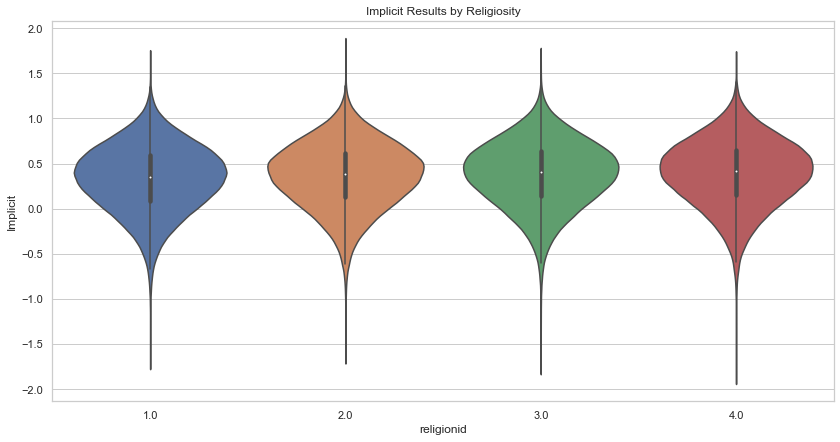

In [212]:
plt.figure(figsize=(14,7))

sns.violinplot(x="religionid", y="Implicit", data=finaldf)
plt.title('Implicit Results by Religiosity');

In [227]:
finaldf.Implicit.min(), finaldf.Implicit.max()

(-1.9234420591846053, 1.834496894436833)

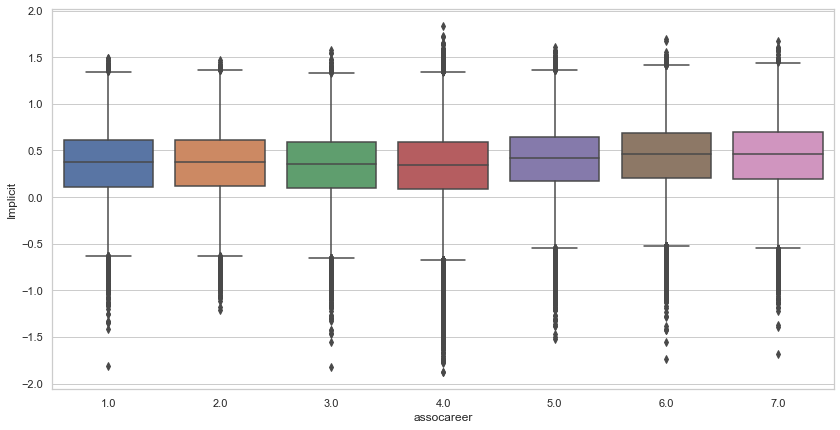

In [214]:
plt.figure(figsize=(14,7))
sns.boxplot(x="assocareer", y="Implicit", data=finaldf);

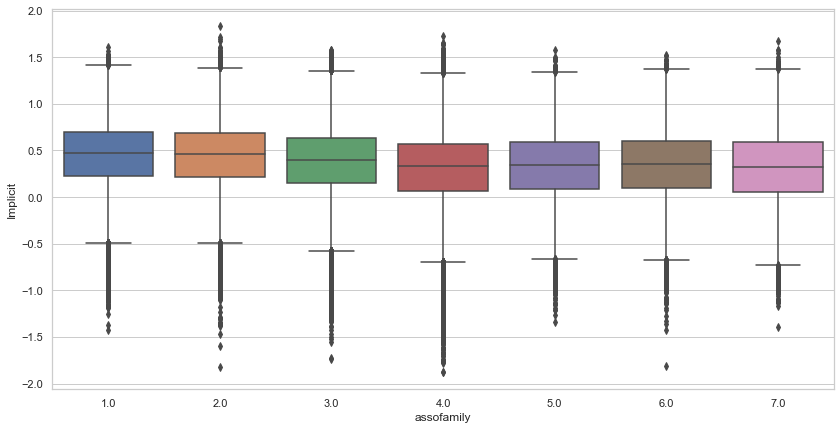

In [215]:
plt.figure(figsize=(14,7))
sns.boxplot(x="assofamily", y="Implicit", data=finaldf);

In [234]:
finaldf['age_groups'] = pd.cut(x=finaldf['age'], bins=[0, 18, 30, 50, 75, np.inf], ordered=True)

''

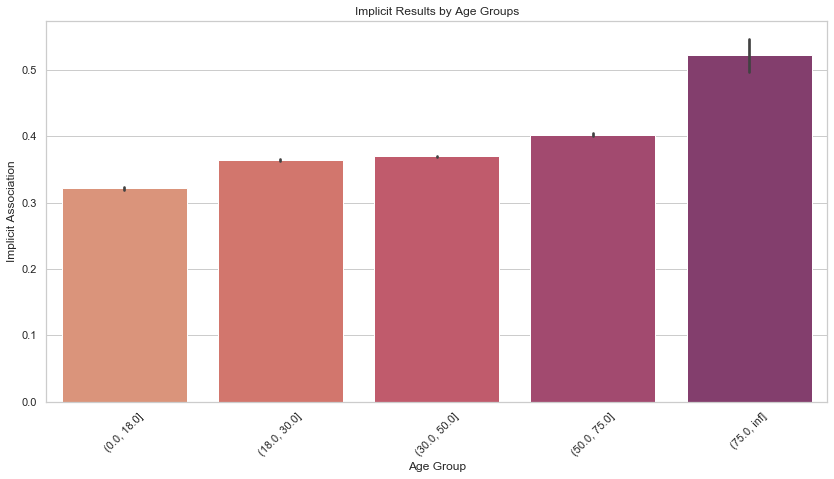

In [235]:
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'age_groups', y= 'Implicit', data=finaldf, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Age Groups')
ax.set_ylabel('Implicit Association')
ax.set_xlabel('Age Group')
plt.xticks(rotation=45)
;

In [237]:
finaldf.anninc.unique()

array(['$200,000+', nan, '$160,001 - $180,000', '$80,001 - $100,000',
       '$40,001 - $60,000', '$20,001 - $40,000', '0 - $20,000',
       '$180,001 - $200,000', '$120,001 - $140,000', '$60,001 - $80,000',
       '$140,001 - $160,000', '$100,001 - $120,000'], dtype=object)

In [239]:
finaldf.anninc.replace(to_replace={'$': '', ',': '_'}, inplace=True)

In [240]:
finaldf.anninc.value_counts()

0 - $20,000            173155
$200,000+              166187
$20,001 - $40,000      149998
$40,001 - $60,000      134382
$60,001 - $80,000      126549
$80,001 - $100,000     119283
$100,001 - $120,000    107032
$120,001 - $140,000     64594
$140,001 - $160,000     53027
$180,001 - $200,000     43103
$160,001 - $180,000     40709
Name: anninc, dtype: int64

In [242]:
# Put income into bins for stuff

''

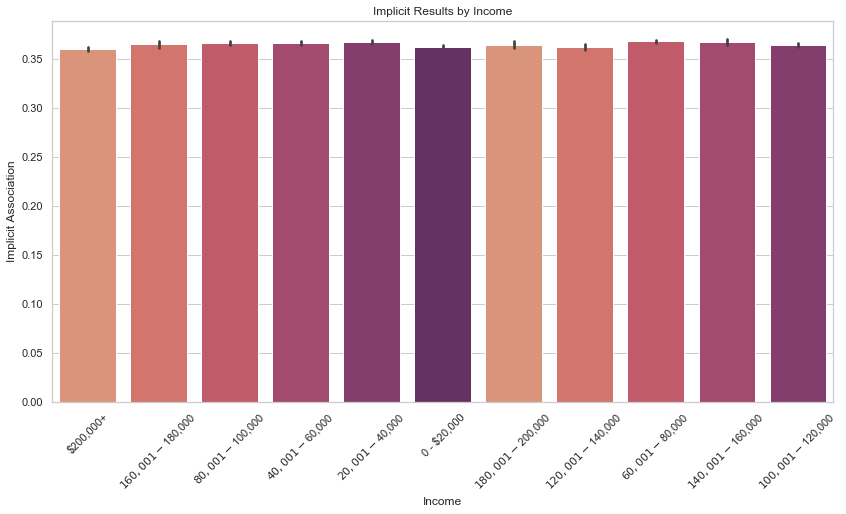

In [228]:
finaldf['income_groups'] = pd.cut(x=finaldf['anninc'], bins=[18, 30, 50, 75, np.inf], ordered=True)
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'anninc', y= 'Implicit', data=finaldf, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Income')
ax.set_ylabel('Implicit Association')
ax.set_xlabel('Income')
plt.xticks(rotation=45)
;

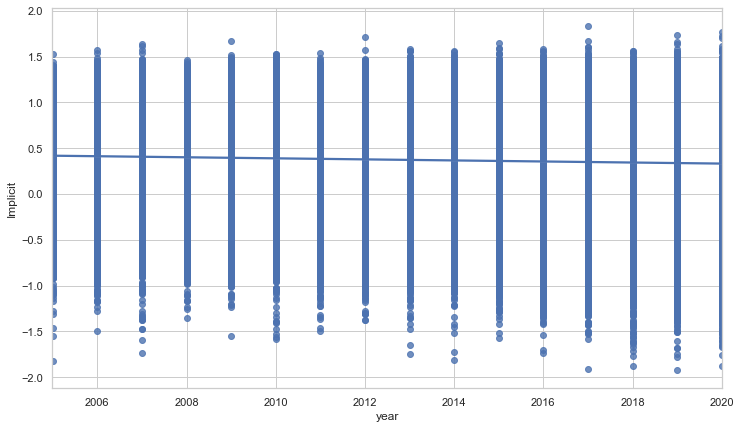

In [253]:
plt.figure(figsize=(12,7))
ax = sns.regplot(x=finaldf['year'], y=finaldf['Implicit'])
plt.show()

In [277]:
import matplotlib.animation as animation
import matplotlib

In [278]:
def animate(i):
    data = finaldf['Implicit'].groupby['State']
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [ ]:
# ani = animation.FuncAnimation(fig, animate, frames=17, repeat=True)
# plt.show();

In [ ]:
# sns.pairplot(finaldf, hue='sex')
# plt.show();

In [1]:
finaldf.info()

NameError: name 'finaldf' is not defined

In [199]:
import geopandas as gpd
import geoplot as gplt

ModuleNotFoundError: No module named 'geopandas'